In [1]:
import numpy as np
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = 'whitegrid', color_codes = True)
%matplotlib inline


In C:\Users\16473\miniconda3\envs\sm-202011\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\16473\miniconda3\envs\sm-202011\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\16473\miniconda3\envs\sm-202011\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\16473\miniconda3\envs\sm-202011\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\16473\miniconda3

In [2]:
account =pd.read_csv("../Test/acct.csv")

In [3]:
account.head()

,Unnamed: 0,branchNumber,type,openDate,id,iban,balance,currency,cust_id
0,0,1416,DDA,3/1/2018,fe51c153-fbec-4b64-9b00-2530035ef0e1_1894a538-...,NaN,447.56,CAD,fe51c153-fbec-4b64-9b00-2530035ef0e1_c418b5e6-...
1,1,1416,SDA,3/1/2018,fe51c153-fbec-4b64-9b00-2530035ef0e1_e4d4cce1-...,NaN,4592.68,CAD,fe51c153-fbec-4b64-9b00-2530035ef0e1_c418b5e6-...
2,2,324,DDA,3/1/2018,fe51c153-fbec-4b64-9b00-2530035ef0e1_b4c1aad5-...,NaN,4132.75,CAD,fe51c153-fbec-4b64-9b00-2530035ef0e1_be23d561-...
3,3,324,SDA,3/1/2018,fe51c153-fbec-4b64-9b00-2530035ef0e1_f71001df-...,NaN,2110.26,CAD,fe51c153-fbec-4b64-9b00-2530035ef0e1_be23d561-...
4,4,1728,DDA,3/1/2018,fe51c153-fbec-4b64-9b00-2530035ef0e1_ec10146d-...,NaN,16981.85,CAD,fe51c153-fbec-4b64-9b00-2530035ef0e1_9ed43d58-...


In [4]:
account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11290 entries, 0 to 11289
Data columns (total 9 columns):
Unnamed: 0      11290 non-null int64
branchNumber    11290 non-null int64
type            11290 non-null object
openDate        11290 non-null object
id              11290 non-null object
iban            0 non-null float64
balance         11290 non-null float64
currency        11290 non-null object
cust_id         11290 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 794.0+ KB


In [5]:
account.shape

(11290, 9)

In [6]:
account.isnull().sum()

Unnamed: 0          0
branchNumber        0
type                0
openDate            0
id                  0
iban            11290
balance             0
currency            0
cust_id             0
dtype: int64

In [7]:
account.drop(['Unnamed: 0', 'iban'], axis=1, inplace=True)

In [8]:
customer =pd.read_csv("../Test/cust.csv")

In [9]:
customer.head()

,Unnamed: 0,id,type,gender,birthDate,workActivity,occupationIndustry,totalIncome,relationshipStatus,habitationStatus,addresses_principalResidence_province,schoolAttendance,schools
0,0,fe51c153-fbec-4b64-9b00-2530035ef0e1_1bf5af3c-...,Personal,Male,12/26/1985,NaN,NaN,0.0,Single,Group,ON,NaN,NaN
1,1,fe51c153-fbec-4b64-9b00-2530035ef0e1_6e740a94-...,Personal,Female,1/30/1977,fulltime,5221 Depository credit intermediation,40009.2,Married,With Spouse,ON,NaN,NaN
2,2,fe51c153-fbec-4b64-9b00-2530035ef0e1_3918fdef-...,Personal,Female,11/22/2003,NaN,NaN,0.0,Single,With Parent,ON,Secondary,1.0
3,3,fe51c153-fbec-4b64-9b00-2530035ef0e1_d81a6d15-...,Personal,Other,5/7/1983,fulltime,"5412 Accounting, tax preparation, bookkeeping ...",44709.0,Married,With Spouse,ON,NaN,NaN
4,4,fe51c153-fbec-4b64-9b00-2530035ef0e1_e21dfbc8-...,Personal,Male,1/29/1983,fulltime,4855 Charter bus industry,21496.0,Single,With Parent,ON,NaN,NaN


In [10]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5645 entries, 0 to 5644
Data columns (total 13 columns):
Unnamed: 0                               5645 non-null int64
id                                       5645 non-null object
type                                     5645 non-null object
gender                                   5645 non-null object
birthDate                                5645 non-null object
workActivity                             4200 non-null object
occupationIndustry                       4915 non-null object
totalIncome                              5645 non-null float64
relationshipStatus                       5645 non-null object
habitationStatus                         4662 non-null object
addresses_principalResidence_province    5645 non-null object
schoolAttendance                         1582 non-null object
schools                                  391 non-null float64
dtypes: float64(2), int64(1), object(10)
memory usage: 573.4+ KB


In [11]:
customer.shape

(5645, 13)

In [12]:
customer.isnull().sum()

Unnamed: 0                                  0
id                                          0
type                                        0
gender                                      0
birthDate                                   0
workActivity                             1445
occupationIndustry                        730
totalIncome                                 0
relationshipStatus                          0
habitationStatus                          983
addresses_principalResidence_province       0
schoolAttendance                         4063
schools                                  5254
dtype: int64

In [13]:
customer['workActivity'].value_counts(normalize=True, dropna=False)

fulltime    0.433304
parttime    0.310717
NaN         0.255979
Name: workActivity, dtype: float64

In [14]:
customer['workActivity'] = customer['workActivity'].fillna(customer['workActivity'].mode()[0])

In [15]:
customer['occupationIndustry'].value_counts(normalize=True, dropna=False)

NaN                                                             0.129318
Retired                                                         0.126661
5221 Depository credit intermediation                           0.043578
6220 Hospitals (6221 to 6223)                                   0.031001
6111 Elementary and secondary schools                           0.027989
                                                                  ...   
4922 Local messengers and local delivery                        0.000177
3333 Commercial and service industry machinery manufacturing    0.000177
2372 Land subdivision                                           0.000177
5174 Satellite telecommunications                               0.000177
7131 Amusement parks and arcades                                0.000177
Name: occupationIndustry, Length: 244, dtype: float64

In [16]:
customer['occupationIndustry'] = customer['occupationIndustry'].fillna(customer['occupationIndustry'].mode()[0])

In [17]:
customer['habitationStatus'].value_counts(normalize=True, dropna=False)

With Spouse    0.503100
With Parent    0.232950
NaN            0.174136
Group          0.089814
Name: habitationStatus, dtype: float64

In [18]:
customer.habitationStatus = customer.habitationStatus.fillna('Single')

In [19]:
customer['schoolAttendance'].value_counts(normalize=True, dropna=False)

NaN               0.719752
Apprenticeship    0.147919
College           0.063065
Secondary         0.056687
Middle            0.011515
Elementary        0.001063
Name: schoolAttendance, dtype: float64

In [20]:
customer['schools'].value_counts(normalize=True, dropna=False)

NaN    0.930735
1.0    0.069265
Name: schools, dtype: float64

In [21]:
customer.drop(['schoolAttendance', 'schools','Unnamed: 0'], axis=1, inplace=True)

In [22]:
transactions =pd.read_csv("../Test/tran.csv")

In [23]:
transactions.head()

,Unnamed: 0,description,currencyAmount,locationRegion,locationCity,originationDateTime,customerId,merchantId,accountId,categoryTags
0,0,ADP PMT 59964899,1092.22,NaN,NaN,2018-06-28T00:00:00.001Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_fa967441-...,NaN,fe51c153-fbec-4b64-9b00-2530035ef0e1_5b35142d-...,Income
1,1,ADP PMT 78870688,701.11,NaN,NaN,2018-06-28T00:00:00.001Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_ee129e70-...,NaN,fe51c153-fbec-4b64-9b00-2530035ef0e1_9172eb97-...,Income
2,2,ROGERS CABLE E2I6X9,111.98,NaN,NaN,2018-04-30T00:00:00.002Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_ad635ae8-...,3d99af81-c081-4d73-bc44-d3a8e639b22a,fe51c153-fbec-4b64-9b00-2530035ef0e1_b527eb36-...,Bills and Utilities
3,3,TIM HORTONS #990 _F,1.16,NaN,NaN,2018-10-09T15:30:00Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_12bd4e47-...,7cc23aa6-0671-4c44-a1b5-b8a98d4bc5d4,fe51c153-fbec-4b64-9b00-2530035ef0e1_1185d0e2-...,Food and Dining
4,4,EMAIL TFR C0***oHp,41.00,NaN,NaN,2018-07-05T00:00:00.001Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_fb97a9de-...,NaN,fe51c153-fbec-4b64-9b00-2530035ef0e1_bf889f32-...,Transfer


In [24]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92304 entries, 0 to 92303
Data columns (total 10 columns):
Unnamed: 0             92304 non-null int64
description            92304 non-null object
currencyAmount         92304 non-null float64
locationRegion         0 non-null float64
locationCity           0 non-null float64
originationDateTime    92304 non-null object
customerId             92304 non-null object
merchantId             43298 non-null object
accountId              92304 non-null object
categoryTags           92160 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 7.0+ MB


In [25]:
transactions.shape

(92304, 10)

In [26]:
missingvalues_percentage = transactions.isnull().sum() * 100 / len(transactions)
missingvalues_percentage

Unnamed: 0               0.000000
description              0.000000
currencyAmount           0.000000
locationRegion         100.000000
locationCity           100.000000
originationDateTime      0.000000
customerId               0.000000
merchantId              53.091957
accountId                0.000000
categoryTags             0.156006
dtype: float64

In [27]:
transactions['categoryTags'].value_counts(normalize=True, dropna=False)

Transfer               0.440934
Income                 0.188410
Bills and Utilities    0.174619
Food and Dining        0.122920
Taxes                  0.022697
Mortgage and Rent      0.017323
Shopping               0.015503
Home                   0.006489
Fees and Charges       0.005449
Travel                 0.002297
NaN                    0.001560
Entertainment          0.001365
Auto and Transport     0.000325
Health and Fitness     0.000087
Kids                   0.000022
Name: categoryTags, dtype: float64

In [28]:
transactions['categoryTags'] = transactions['categoryTags'].fillna(transactions['categoryTags'].mode()[0])

In [29]:
transactions['merchantId'] = transactions['merchantId'].fillna(transactions['merchantId'].mode()[0])

In [30]:
transactions.drop(['locationRegion', 'locationCity','Unnamed: 0'], axis=1, inplace=True)

In [31]:
account.head()

,branchNumber,type,openDate,id,balance,currency,cust_id
0,1416,DDA,3/1/2018,fe51c153-fbec-4b64-9b00-2530035ef0e1_1894a538-...,447.56,CAD,fe51c153-fbec-4b64-9b00-2530035ef0e1_c418b5e6-...
1,1416,SDA,3/1/2018,fe51c153-fbec-4b64-9b00-2530035ef0e1_e4d4cce1-...,4592.68,CAD,fe51c153-fbec-4b64-9b00-2530035ef0e1_c418b5e6-...
2,324,DDA,3/1/2018,fe51c153-fbec-4b64-9b00-2530035ef0e1_b4c1aad5-...,4132.75,CAD,fe51c153-fbec-4b64-9b00-2530035ef0e1_be23d561-...
3,324,SDA,3/1/2018,fe51c153-fbec-4b64-9b00-2530035ef0e1_f71001df-...,2110.26,CAD,fe51c153-fbec-4b64-9b00-2530035ef0e1_be23d561-...
4,1728,DDA,3/1/2018,fe51c153-fbec-4b64-9b00-2530035ef0e1_ec10146d-...,16981.85,CAD,fe51c153-fbec-4b64-9b00-2530035ef0e1_9ed43d58-...


In [32]:
customer.head()

,id,type,gender,birthDate,workActivity,occupationIndustry,totalIncome,relationshipStatus,habitationStatus,addresses_principalResidence_province
0,fe51c153-fbec-4b64-9b00-2530035ef0e1_1bf5af3c-...,Personal,Male,12/26/1985,fulltime,Retired,0.0,Single,Group,ON
1,fe51c153-fbec-4b64-9b00-2530035ef0e1_6e740a94-...,Personal,Female,1/30/1977,fulltime,5221 Depository credit intermediation,40009.2,Married,With Spouse,ON
2,fe51c153-fbec-4b64-9b00-2530035ef0e1_3918fdef-...,Personal,Female,11/22/2003,fulltime,Retired,0.0,Single,With Parent,ON
3,fe51c153-fbec-4b64-9b00-2530035ef0e1_d81a6d15-...,Personal,Other,5/7/1983,fulltime,"5412 Accounting, tax preparation, bookkeeping ...",44709.0,Married,With Spouse,ON
4,fe51c153-fbec-4b64-9b00-2530035ef0e1_e21dfbc8-...,Personal,Male,1/29/1983,fulltime,4855 Charter bus industry,21496.0,Single,With Parent,ON


In [33]:
transactions.head()

,description,currencyAmount,originationDateTime,customerId,merchantId,accountId,categoryTags
0,ADP PMT 59964899,1092.22,2018-06-28T00:00:00.001Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_fa967441-...,852223a6-f227-4e4c-818e-36bb880866f2,fe51c153-fbec-4b64-9b00-2530035ef0e1_5b35142d-...,Income
1,ADP PMT 78870688,701.11,2018-06-28T00:00:00.001Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_ee129e70-...,852223a6-f227-4e4c-818e-36bb880866f2,fe51c153-fbec-4b64-9b00-2530035ef0e1_9172eb97-...,Income
2,ROGERS CABLE E2I6X9,111.98,2018-04-30T00:00:00.002Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_ad635ae8-...,3d99af81-c081-4d73-bc44-d3a8e639b22a,fe51c153-fbec-4b64-9b00-2530035ef0e1_b527eb36-...,Bills and Utilities
3,TIM HORTONS #990 _F,1.16,2018-10-09T15:30:00Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_12bd4e47-...,7cc23aa6-0671-4c44-a1b5-b8a98d4bc5d4,fe51c153-fbec-4b64-9b00-2530035ef0e1_1185d0e2-...,Food and Dining
4,EMAIL TFR C0***oHp,41.00,2018-07-05T00:00:00.001Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_fb97a9de-...,852223a6-f227-4e4c-818e-36bb880866f2,fe51c153-fbec-4b64-9b00-2530035ef0e1_bf889f32-...,Transfer


In [34]:
account.rename(columns={'cust_id':'customerId'}, inplace=True)

In [35]:
account.rename(columns={'id':'accountId'}, inplace=True)

In [36]:
customer.rename(columns={'id':'customerId'}, inplace=True)

In [37]:
account_customer = pd.merge(account, customer, on="customerId")

In [38]:
account_customer 

,branchNumber,type_x,openDate,accountId,balance,currency,customerId,type_y,gender,birthDate,workActivity,occupationIndustry,totalIncome,relationshipStatus,habitationStatus,addresses_principalResidence_province
0,1416,DDA,3/1/2018,fe51c153-fbec-4b64-9b00-2530035ef0e1_1894a538-...,447.56,CAD,fe51c153-fbec-4b64-9b00-2530035ef0e1_c418b5e6-...,Personal,Female,1/29/1950,parttime,6111 Elementary and secondary schools,11481.70,Separated,Group,ON
1,1416,SDA,3/1/2018,fe51c153-fbec-4b64-9b00-2530035ef0e1_e4d4cce1-...,4592.68,CAD,fe51c153-fbec-4b64-9b00-2530035ef0e1_c418b5e6-...,Personal,Female,1/29/1950,parttime,6111 Elementary and secondary schools,11481.70,Separated,Group,ON
2,324,DDA,3/1/2018,fe51c153-fbec-4b64-9b00-2530035ef0e1_b4c1aad5-...,4132.75,CAD,fe51c153-fbec-4b64-9b00-2530035ef0e1_be23d561-...,Personal,Male,4/5/1993,parttime,6113 Universities,5150.64,Single,With Parent,ON
3,324,SDA,3/1/2018,fe51c153-fbec-4b64-9b00-2530035ef0e1_f71001df-...,2110.26,CAD,fe51c153-fbec-4b64-9b00-2530035ef0e1_be23d561-...,Personal,Male,4/5/1993,parttime,6113 Universities,5150.64,Single,With Parent,ON
4,1728,DDA,3/1/2018,fe51c153-fbec-4b64-9b00-2530035ef0e1_ec10146d-...,16981.85,CAD,fe51c153-fbec-4b64-9b00-2530035ef0e1_9ed43d58-...,Personal,Male,6/8/1964,fulltime,8121 Personal care services,39075.85,Married,With Spouse,ON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11285,1476,SDA,3/1/2018,fe51c153-fbec-4b64-9b00-2530035ef0e1_cb77281f-...,8746.34,CAD,fe51c153-fbec-4b64-9b00-2530035ef0e1_607b53c5-...,Personal,Female,4/4/1966,parttime,5191 Other information services,21365.85,Married,With Spouse,ON
11286,328,DDA,3/1/2018,fe51c153-fbec-4b64-9b00-2530035ef0e1_6f80aba9-...,15836.91,CAD,fe51c153-fbec-4b64-9b00-2530035ef0e1_1df17f1c-...,Personal,Female,5/6/1995,fulltime,8129 Other personal services,21192.93,Single,With Parent,ON
11287,328,SDA,3/1/2018,fe51c153-fbec-4b64-9b00-2530035ef0e1_a2b346f3-...,8527.18,CAD,fe51c153-fbec-4b64-9b00-2530035ef0e1_1df17f1c-...,Personal,Female,5/6/1995,fulltime,8129 Other personal services,21192.93,Single,With Parent,ON
11288,1337,DDA,3/1/2018,fe51c153-fbec-4b64-9b00-2530035ef0e1_8c8f55a5-...,8798.24,CAD,fe51c153-fbec-4b64-9b00-2530035ef0e1_7892d5e8-...,Personal,Male,12/26/1995,parttime,"5416 Management, scientific and technical cons...",11589.60,Single,With Parent,ON


In [39]:
customers = pd.merge(account_customer,transactions, on="accountId")

In [40]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92304 entries, 0 to 92303
Data columns (total 22 columns):
branchNumber                             92304 non-null int64
type_x                                   92304 non-null object
openDate                                 92304 non-null object
accountId                                92304 non-null object
balance                                  92304 non-null float64
currency                                 92304 non-null object
customerId_x                             92304 non-null object
type_y                                   92304 non-null object
gender                                   92304 non-null object
birthDate                                92304 non-null object
workActivity                             92304 non-null object
occupationIndustry                       92304 non-null object
totalIncome                              92304 non-null float64
relationshipStatus                       92304 non-null object
habitati

In [41]:
customers.drop(['customerId_y'], axis=1, inplace=True)

In [42]:
customers.rename(columns={'customerId_x':'customerId'}, inplace=True)

In [43]:
customers.rename(columns={'type_x':'type'}, inplace=True)

In [44]:
customers.rename(columns={'type_y':'account_type'}, inplace=True)

In [45]:
customers.head()

,branchNumber,type,openDate,accountId,balance,currency,customerId,account_type,gender,birthDate,...,occupationIndustry,totalIncome,relationshipStatus,habitationStatus,addresses_principalResidence_province,description,currencyAmount,originationDateTime,merchantId,categoryTags
0,1416,DDA,3/1/2018,fe51c153-fbec-4b64-9b00-2530035ef0e1_1894a538-...,447.56,CAD,fe51c153-fbec-4b64-9b00-2530035ef0e1_c418b5e6-...,Personal,Female,1/29/1950,...,6111 Elementary and secondary schools,11481.7,Separated,Group,ON,E TFR C2***uuz,60.00,2018-05-01T23:59:30Z,852223a6-f227-4e4c-818e-36bb880866f2,Transfer
1,1416,DDA,3/1/2018,fe51c153-fbec-4b64-9b00-2530035ef0e1_1894a538-...,447.56,CAD,fe51c153-fbec-4b64-9b00-2530035ef0e1_c418b5e6-...,Personal,Female,1/29/1950,...,6111 Elementary and secondary schools,11481.7,Separated,Group,ON,MYRATE ENRGY A3Q9HP,23.14,2018-10-05T00:00:00.001Z,65d5020c-24b6-4f1e-ba01-47411d1e4244,Bills and Utilities
2,1416,DDA,3/1/2018,fe51c153-fbec-4b64-9b00-2530035ef0e1_1894a538-...,447.56,CAD,fe51c153-fbec-4b64-9b00-2530035ef0e1_c418b5e6-...,Personal,Female,1/29/1950,...,6111 Elementary and secondary schools,11481.7,Separated,Group,ON,ROGERS CABLE G9O8C8,102.99,2018-08-13T00:00:00.001Z,3d99af81-c081-4d73-bc44-d3a8e639b22a,Bills and Utilities
3,1416,DDA,3/1/2018,fe51c153-fbec-4b64-9b00-2530035ef0e1_1894a538-...,447.56,CAD,fe51c153-fbec-4b64-9b00-2530035ef0e1_c418b5e6-...,Personal,Female,1/29/1950,...,6111 Elementary and secondary schools,11481.7,Separated,Group,ON,E TFR C0***btC,20.00,2018-04-30T23:59:30Z,852223a6-f227-4e4c-818e-36bb880866f2,Transfer
4,1416,DDA,3/1/2018,fe51c153-fbec-4b64-9b00-2530035ef0e1_1894a538-...,447.56,CAD,fe51c153-fbec-4b64-9b00-2530035ef0e1_c418b5e6-...,Personal,Female,1/29/1950,...,6111 Elementary and secondary schools,11481.7,Separated,Group,ON,ROGERS CABLE Z8Y1I6,102.99,2018-10-15T00:00:00.001Z,3d99af81-c081-4d73-bc44-d3a8e639b22a,Bills and Utilities


In [95]:
customers.columns

Index(['branchNumber', 'type', 'openDate', 'accountId', 'balance', 'currency',
       'customerId', 'account_type', 'gender', 'birthDate', 'workActivity',
       'occupationIndustry', 'totalIncome', 'relationshipStatus',
       'habitationStatus', 'addresses_principalResidence_province',
       'description', 'currencyAmount', 'originationDateTime', 'merchantId',
       'categoryTags'],
      dtype='object')

In [50]:
customers['customerId'].describe()

count                                                 92304
unique                                                 5483
top       fe51c153-fbec-4b64-9b00-2530035ef0e1_e9d224b9-...
freq                                                     79
Name: customerId, dtype: object

In [51]:
customers['accountId'].describe()   

count                                                 92304
unique                                                 7475
top       fe51c153-fbec-4b64-9b00-2530035ef0e1_56aa1fd1-...
freq                                                     78
Name: accountId, dtype: object

In [52]:
customers['merchantId'].describe()

count                                    92304
unique                                     738
top       852223a6-f227-4e4c-818e-36bb880866f2
freq                                     55673
Name: merchantId, dtype: object

In [63]:
customers['totalIncome'].describe()

count     92304.000000
mean      31915.329017
std       33942.826003
min           0.000000
25%        9267.390000
50%       23736.900000
75%       42684.550000
max      365126.300000
Name: totalIncome, dtype: float64

In [116]:
customers['currencyAmount'].describe()

count     92304.000000
mean        763.088519
std        2852.559239
min           0.000000
25%          29.000000
50%          97.950000
75%         731.720000
max      134099.200000
Name: currencyAmount, dtype: float64

In [53]:
customers['categoryTags'].describe()

count        92304
unique          14
top       Transfer
freq         40844
Name: categoryTags, dtype: object

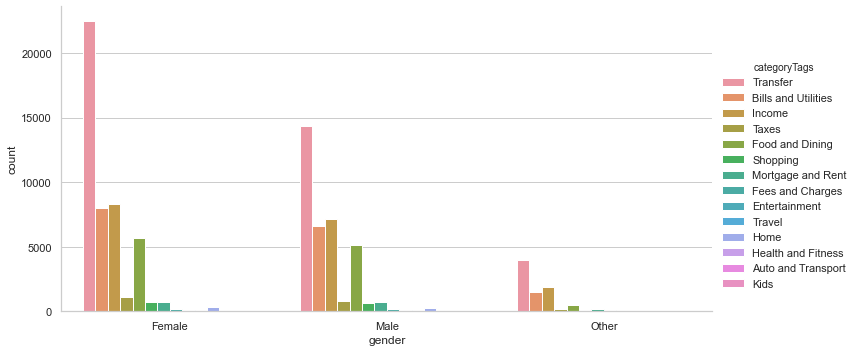

In [87]:
sns.catplot(data=customers,hue="categoryTags",kind="count",x="gender",height=5, aspect=2)
plt.show()

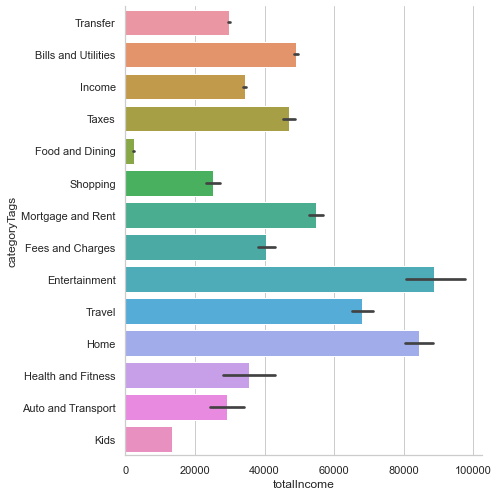

In [83]:
sns.catplot(data=customers,y="categoryTags",x="totalIncome",kind="bar",height=7,aspect=1)

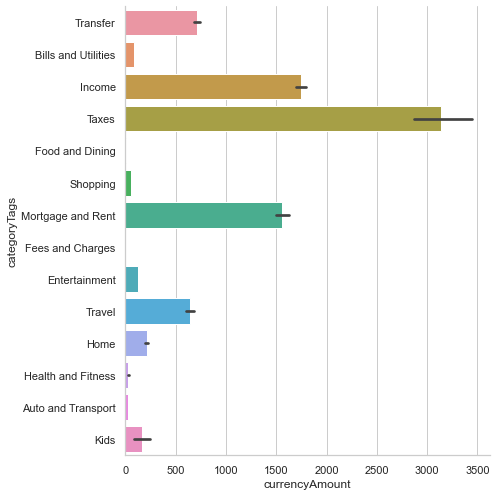

In [107]:
sns.catplot(data=customers,y="categoryTags",x="currencyAmount",kind="bar",height=7,aspect=1)

In [ ]:
sns.catplot(data=customers,hue="categoryTags",kind="bar",x="habitationStatus",height=5, aspect=2)
plt.show() 

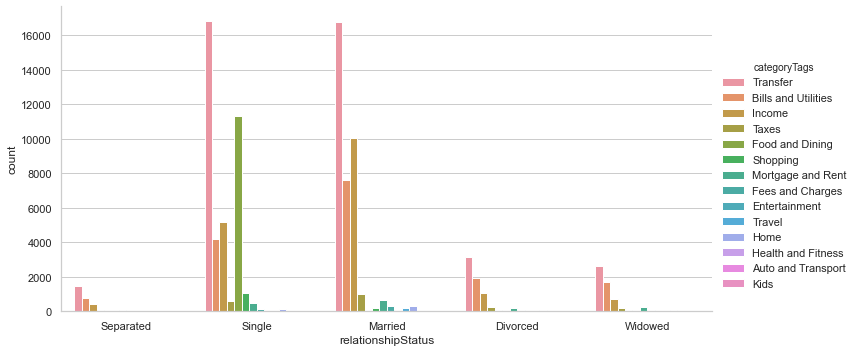

In [89]:
sns.catplot(data=customers,hue="categoryTags",kind="count",x="relationshipStatus",height=5, aspect=2)
plt.show() 

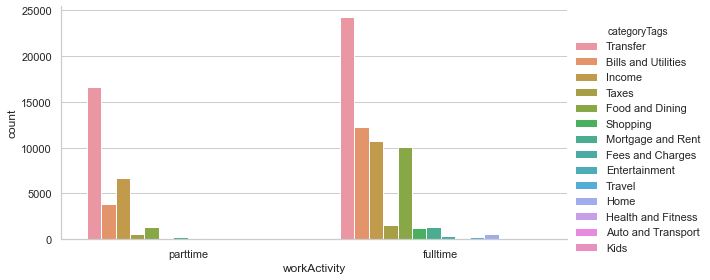

In [103]:
sns.catplot(data=customers,hue="categoryTags",kind="count",x="workActivity",height=4, aspect=2)
plt.show()

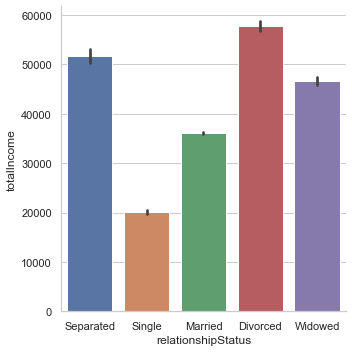

In [93]:
sns.catplot(data=customers,x="relationshipStatus",y="totalIncome",kind="bar",height=5,aspect=1)

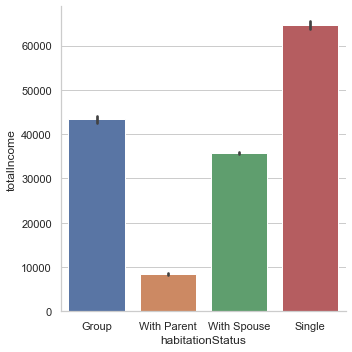

In [92]:
sns.catplot(data=customers,x="habitationStatus",y="totalIncome",kind="bar",height=5,aspect=1)